# Introduction

This notebook is used to search a folder containing images of scanned photos, finds any images which are the blank reverse side of photos and deletes them.

# Import libraries and run functions

In [1]:
import os # To navigate folders and manipulate files
import matplotlib.pyplot as plt
import matplotlib.image as mpimg # To open image files
from PIL import ImageGrab # To take screenshot
import time # To inject time pauses
import ctypes # To execute alt-tab

In [109]:
def alt_tab(tab_number=1):
    '''Mimics the windows alt-tab keystroke shortcut. 
    
    INPUTS: tab_number(int): Number of times the tab button should be applied. 
            note: tab_number should be 0 in order to return to original screen
    RETURNS: none
    '''
    
    ctypes.windll.user32.keybd_event(0x12, 0, 0, 0) # Alt
    time.sleep(0.3)
    
    for i in range(tab_number):     
        ctypes.windll.user32.keybd_event(0x09, 0, 0, 0) # Tab
        time.sleep(0.3)
        
    ctypes.windll.user32.keybd_event(0x09, 0, 2, 0) # un-Tab
    time.sleep(0.3)
    
    ctypes.windll.user32.keybd_event(0x12, 0, 2, 0) # un-Alt

# The problem

Converting a collection of hard-copy photos to digital image files is easy with a good scanner e.g.

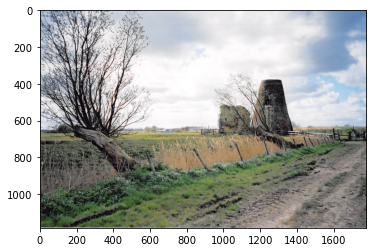

In [93]:
plt.imshow(mpimg.imread(os.path.join(r'C:\Scanned Photos','2022-01-03-15-13-330003.jpg')));

However often the scanner detects text on the reverse of the photo and consider it a legitimate image, e.g.

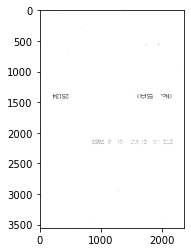

In [94]:
plt.imshow(mpimg.imread(os.path.join(r'C:\Scanned Photos','2022-01-03-15-13-330002.jpg')));

This can lead to having many unwanted images stored in a folder, as the following screenshot illustrates.  These reverse-side images are not needed so a means to identify and remove them is required.<br>
For demonstration purposes: open Windows Explorer and navigate to the folder containing the images.

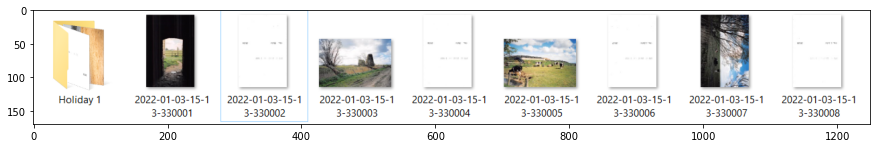

In [99]:
# Execute automatic alt-tab to switch to view folder
alt_tab(tab_number=1) # tab_number=1 assumes the folder is the next tab
time.sleep(0.5)

# Take screenshot
screenshot = ImageGrab.grab()
time.sleep(0.5)

# Return to notebook
alt_tab(tab_number=1)

# Crop image if needed
box = (350,230,1600,400) # hard-coded values specific to the images in this particular folder
screenshot = screenshot.crop(box)

# Display cropped screenshot
plt.figure(figsize = (15,15));
plt.imshow(screenshot);

# Set up
Firstly the folder path containing the images is manually specified by the user.<br>
This folder path is scanned and any subfolders identified so that they can be searched as well.

In [100]:
# Define top-level path containing subfolders
top_level_path = r'C:\Scanned Photos'

In [101]:
# Generate list of sub-folders
folders_list = [''] # use of '' allows the top-level folder to be searched
for item in os.scandir(top_level_path):
    if item.is_dir():
        folders_list.append(item.name)

In [102]:
print(folders_list)

['', 'Holiday 1']


# Search for blank reverse-side images

The below cell loops through all the sub-folders, identifies jpg image files and determines whether they are blank. A list of images is saved to a dictionary with the folder name as the key.<br><br>
Method of segmentation: Since the photos reverse sides are vastly white with often only a little text, a simple method of finding the average pixel value can be used. The RGB value of white pixels is [256,256,256], so a threshold may be used to seperate the real photo image from the reverse image. 

In [104]:
files_to_delete_dict = {}

# Search through each sub-folder
for folder in folders_list:
    
    print(f'Searching: top-level folder') if folder=='' else print(f'Searching: {folder}')
    
    files_to_delete_list = []
    
    # Loop over all files in folder
    for file in os.listdir(os.path.join(top_level_path,folder)):
        if file.endswith('.jpg'):
            
            # Open image
            im = mpimg.imread(os.path.join(top_level_path,folder,file))

            # Calc single average pixel value across whole image and the three colours
            image_average = np.asarray(im).mean(axis=0).mean(axis=0).mean(axis=0)
            
            # Blank images are predominantly white and have large pixel values 
            if image_average>250: # hard coded value works well
                files_to_delete_list.append(file)
                
    print(f'- found {len(files_to_delete_list)} blank images')
                
    # Update dictionary            
    files_to_delete_dict[folder] = files_to_delete_list

Searching: top-level folder
- found 4 blank images
Searching: Holiday 1
- found 1 blank images


# Manual review of found reverse-side images

It makes sense to manually review the found images, to make sure that no legitimate photos are removed by mistake. <br>
Running this cell displays a thumbnail of each discovered blank image.

: '2022-01-03-15-13-330002.jpg'


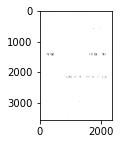

: '2022-01-03-15-13-330004.jpg'


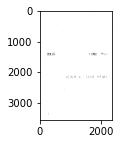

: '2022-01-03-15-13-330006.jpg'


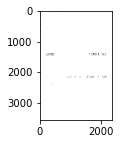

: '2022-01-03-15-13-330008.jpg'


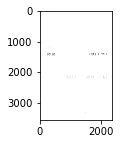

Holiday 1: '2022-01-03-15-13-330010.jpg'


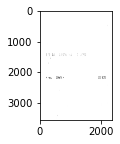

In [105]:
for folder,file_list in files_to_delete_dict.items():   
    for file in file_list:    
        print(f"{folder}: '{file}'")

        plt.figure(figsize = (2,2)) # Set smaller thumbnail image size for display
        imgplot = plt.imshow(mpimg.imread(os.path.join(top_level_path,folder,file)))
        plt.show()
        plt.close()

# Delete blank images

This cell loops through all the reverse-side images and deletes them.  <br>
**Warning: The removed files do not appear in the recycle bin and may not be recoverable**

In [106]:
for folder,file_list in files_to_delete_dict.items():
    for file in file_list:
        os.remove(os.path.join(top_level_path,folder,file))

# Verification

This cell double checks that all the reverse-side images have been removed by grabbing another screenshot of the folder. <br>
As can be seen in the above screenshot, all the blank images have been removed as required.

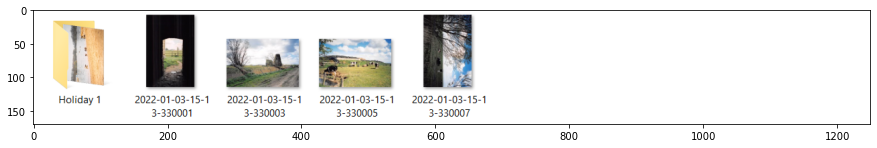

In [108]:
# Execute alt-tab to switch to view folder
alt_tab(tab_number=1)
time.sleep(0.5)

# Take screenshot
screenshot = ImageGrab.grab()
time.sleep(0.5)
# Return to notebook
alt_tab(tab_number=1)

# Crop image
box = (350,230,1600,400)
screenshot = screenshot.crop(box)

# Display cropped screenshot
plt.figure(figsize = (15,15));
plt.imshow(screenshot);